# Titanic Survival Classification Model

Greetings!!!


We will be performing the following tasks :

- Importing necessary files
- Data Cleanining
- Data Visualisation
- Label Encoding
- Decision Tree Classification Model
- Hyper-Parameter Tuning
- Final Result

### Importing necessary modules and reading the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the dataset

In [3]:
print(df.shape)
print()
print(df.info())
print()
print(df.describe())

(891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.35384

### Handling Null Values

<AxesSubplot:>

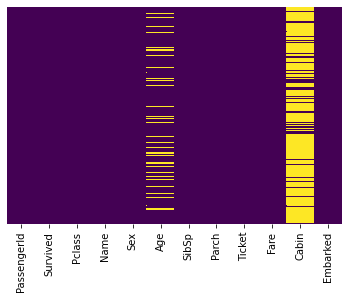

In [4]:
sns.heatmap(df.isna(),yticklabels = False ,cbar = False,cmap = 'viridis')

###### Handling Cabin Null values

In [5]:
df.drop(columns = 'Cabin', axis=1, inplace = True)

###### Handling Age Null values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

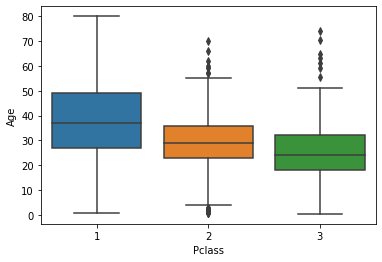

In [6]:
sns.boxplot(data = df, y = 'Age', x = 'Pclass')

In [7]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df['Age'][df['Pclass']==1].mean()
        if Pclass == 2:
            return df['Age'][df['Pclass'] == 2].mean()
        if Pclass == 3:
            return df['Age'][df['Pclass'] == 3].mean()
    else:
        return Age

In [8]:
df['Age'] = df[['Age', 'Pclass']].apply(fillage, axis = 1)

<AxesSubplot:>

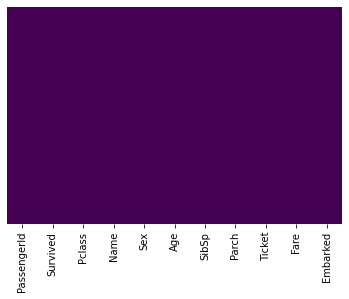

In [9]:
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

### Data Visualisation

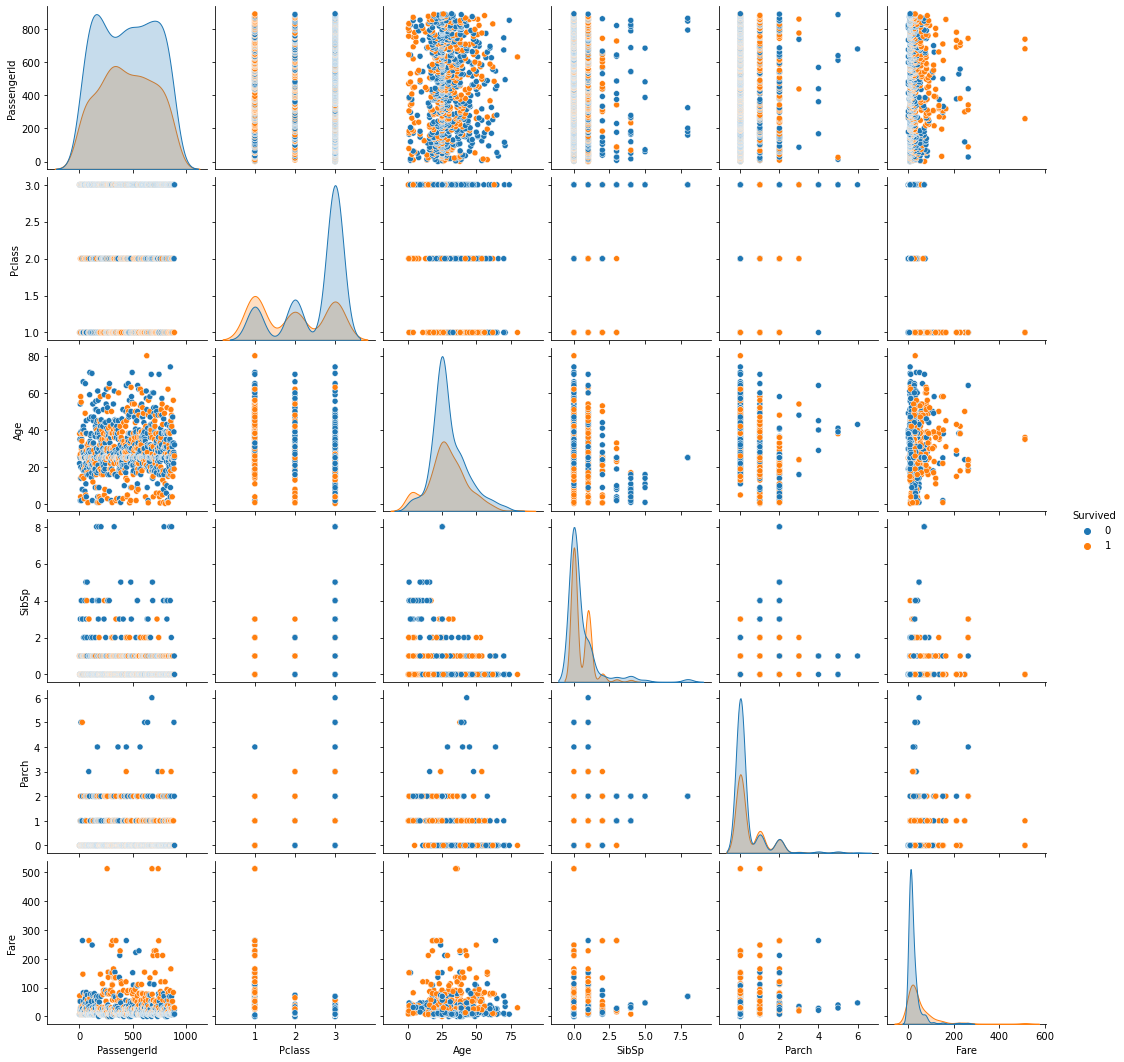

In [10]:
sns.pairplot(df, hue="Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

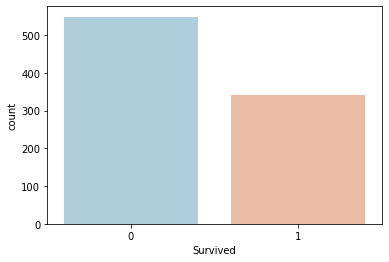

In [11]:
sns.countplot(data=df, x="Survived", palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

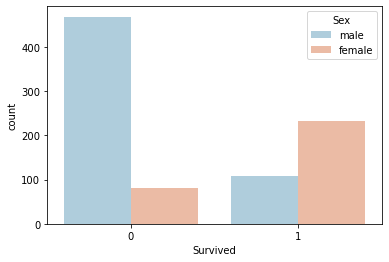

In [12]:
sns.countplot(x="Survived", hue="Sex", data=df, palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

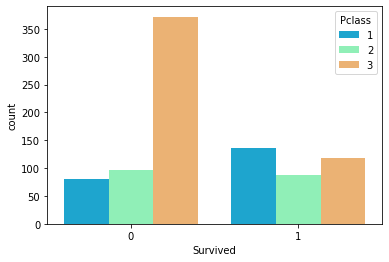

In [13]:
sns.countplot(data=df, x="Survived", hue="Pclass", palette="rainbow")

<AxesSubplot:xlabel='Survived', ylabel='count'>

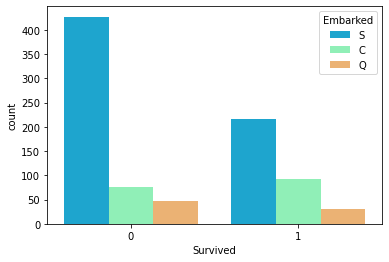

In [14]:
sns.countplot(data=df, x="Survived", hue="Embarked", palette="rainbow")

<AxesSubplot:xlabel='Age', ylabel='Density'>

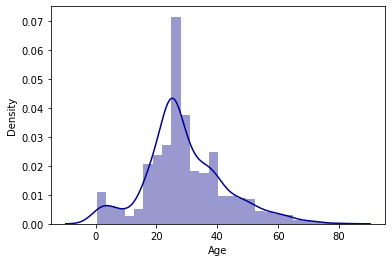

In [15]:
sns.distplot(df["Age"], color="darkblue")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

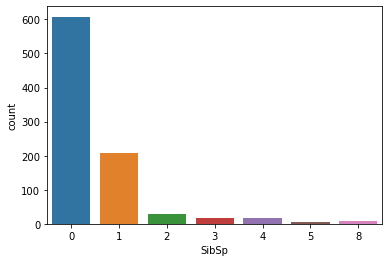

In [16]:
sns.countplot(data=df, x="SibSp")

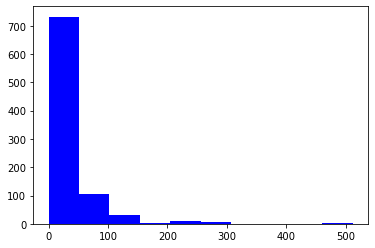

In [17]:
plt.hist(df["Fare"], color="blue")
plt.show()

### Label Encoding

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
df['Embarked'] = df.Embarked.astype('str')

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


### Preprocessing Data

In [22]:
df.drop(columns = ['PassengerId','Name','Ticket'],axis = 1, inplace = True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [24]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.050504,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.403858,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.080464,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.050504,-0.403858,0.080464,1.000000,-0.243452,-0.175799,0.120886,-0.012130
SibSp,-0.035322,0.083081,-0.114631,-0.243452,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.175799,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.120886,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.012130,0.066654,0.038322,-0.221226,1.000000


In [25]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.25,random_state = 0,stratify = y)

### Decision Tree Classifier Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [29]:
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}\n')
print(f'Classification Report : \n{classification_report(ytest,ypred)}')

Accuracy Score : 0.8071748878923767

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       137
           1       0.76      0.73      0.75        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



### Hyper-Parameter Tuning

In [30]:
accuracy=[]
for i in range(1,50):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

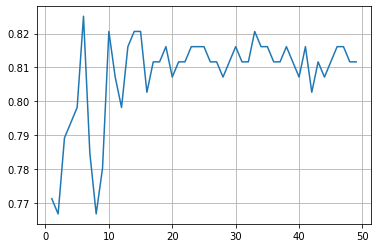

In [31]:
plt.plot(range(1,50), accuracy)
plt.grid(True)
plt.show()

In [32]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.8251121076233184


In [33]:
accuracy=[]
for i in range(1,60):
    dt=DecisionTreeClassifier(min_samples_leaf=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

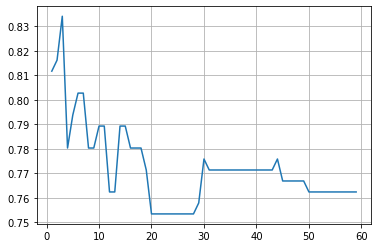

In [34]:
plt.plot(range(1,60), accuracy)
plt.grid(True)
plt.show()

In [35]:
dt = DecisionTreeClassifier(min_samples_leaf = 2)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.8251121076233184


In [36]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 2)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.8295964125560538


In [37]:
accuracy=[]
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

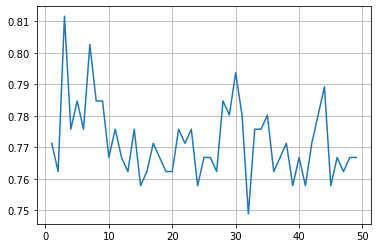

In [38]:
plt.plot(range(1,50), accuracy)
plt.grid(True)
plt.show()

In [39]:
dt=DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.8116591928251121


In [40]:
accuracy=[]
for i in range(1,60):
    dt=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

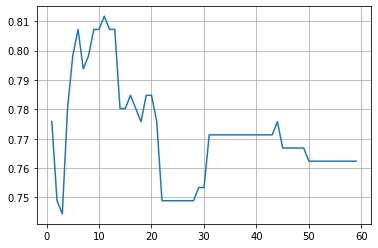

In [41]:
plt.plot(range(1,60), accuracy)
plt.grid(True)
plt.show()

In [42]:
dt=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 11)
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.8116591928251121


In [43]:
dt=DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.7892376681614349


In [44]:
dt=DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 11)
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}')

Accuracy Score : 0.7892376681614349


### Final Model

In [45]:
dtf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 2)
dtf.fit(xtrain,ytrain)
ypred = dtf.predict(xtest)
print(f'Accuracy Score : {accuracy_score(ytest,ypred)}\n')
print(f'Classification Report : \n{classification_report(ytest,ypred)}')

Accuracy Score : 0.8295964125560538

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       137
           1       0.82      0.72      0.77        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



### CVS Mean Score for the model

In [46]:
cvs = cross_val_score(dtf, x, y ,cv = 5, scoring = 'accuracy')
print(f'CVS Mean : {cvs.mean()}')

CVS Mean : 0.8148138848785387


###### Our final model classifies the survival of the passenger with 83% accuracy